# Exploratory Notebook

## Ideas

**How can we optimise the image encoding method for a stable renderer such that human participants can best infer the original *information*?** (not necessarily the original image, just what it represents).

Moreso, how can we do this ***without* knowing what the renderer looks like**?

### "Half"-Autoencoder

Auto-encoders typically train an encoding and decoding network to match an input to the output. 

Can restrictions be placed on the decoding network such that a "half"-autoencoder could be trained? (i.e. training the network to match input to the output, but making most of the training occur in the encoder?)




# Flow

## Digit to Image

In [13]:
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [14]:
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

In [184]:
def digit_to_image(digit : int, xloc : float, yloc : float):
    fig = plt.figure(figsize=(1,1))
    canvas = FigureCanvas(fig)
    ax = plt.gca()
    fig.patch.set_facecolor('black')
    plt.axis('off')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.text(xloc, yloc, str(digit),
             size=48,
             color='white',
             clip_box=ax.clipbox,
             clip_on=True,
             horizontalalignment = 'center',
             verticalalignment = 'center',
             linespacing = 0,
             #bbox=dict(facecolor='red', alpha=0.5),
             transform=ax.transAxes)
    plt.savefig(f'{digit}.png', pad_inches=0, facecolor='black')
    canvas.draw()
    width, height = fig.get_size_inches() * fig.get_dpi()
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)
    plt.close(fig)
    return image

In [185]:
# import os
# os.chdir('../data/digit-images-aliased')

FileNotFoundError: [Errno 2] No such file or directory: '../data/digit-images-aliased'

[None, None, None, None, None, None, None, None, None, None]

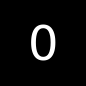

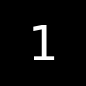

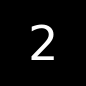

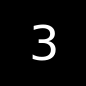

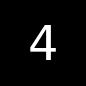

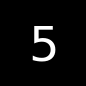

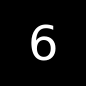

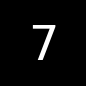

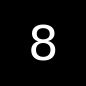

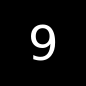

In [186]:
# [digit_to_image(d, 0.5, 0.45) for d in range(10)]

In [24]:
%time test = digit_to_image(9,0.5, 0.45)

CPU times: user 30.8 ms, sys: 4.33 ms, total: 35.1 ms
Wall time: 33.1 ms


In [25]:
np.shape(test)

(72, 72, 3)

## Image to Digit

In [26]:
import tensorflow as tf
tf.executing_eagerly()
import keras

In [27]:
import skimage.color as color

In [28]:
# %%time

digit_train_n = 1200
digit_train_truth = np.random.randint(0, 10, digit_train_n)
digit_train_data =  np.array([color.rgb2gray(digit_to_image(digit, random.random()/2, random.random()/2)) for digit in digit_train_truth])

digit_test_n = 600
digit_test_truth = np.random.randint(0, 10, digit_test_n)
digit_test_data =  np.array([color.rgb2gray(digit_to_image(digit, random.random()/2, random.random()/2)) for digit in digit_test_truth])

In [29]:
input_shape = (72, 72)

In [30]:
digit_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(144, activation=tf.nn.relu),  
    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
    #tf.keras.layers.Dense(16, activation=tf.nn.relu), 
    #tf.keras.layers.Dense(64, activation=tf.nn.relu),  
    #tf.keras.layers.Dense(32, activation=tf.nn.relu),  
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [31]:
digit_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
digit_model.fit(digit_train_data, digit_train_truth, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 1s 683us/sample - loss: 2.2715 - accuracy: 0.1683
Epoch 2/10
1200/1200 [==============================] - 1s 459us/sample - loss: 1.8784 - accuracy: 0.3792
Epoch 3/10
1200/1200 [==============================] - 1s 453us/sample - loss: 1.4759 - accuracy: 0.5300
Epoch 4/10
1200/1200 [==============================] - 0s 345us/sample - loss: 1.1415 - accuracy: 0.6625
Epoch 5/10
1200/1200 [==============================] - 1s 437us/sample - loss: 0.8511 - accuracy: 0.7533
Epoch 6/10
1200/1200 [==============================] - 0s 386us/sample - loss: 0.6090 - accuracy: 0.8492
Epoch 7/10
1200/1200 [==============================] - 0s 413us/sample - loss: 0.4493 - accuracy: 0.8808
Epoch 8/10
1200/1200 [==============================] - 1s 423us/sample - loss: 0.3670 - accuracy: 0.8992
Epoch 9/10
1200/1200 [==============================] - 0s 382us/sample - loss: 0.2865 - accuracy: 0.9258
Epoch 10/10
1200/1200 [=======================

In [33]:
digit_model.evaluate(digit_test_data, digit_test_truth)

600/600 [==============================] - 0s 324us/sample - loss: 0.8857 - accuracy: 0.7283


[0.8856666692097982, 0.72833335]

In [34]:
predictions = digit_model.predict_on_batch(digit_test_data)

In [35]:
classes = [np.argmax(prediction) for prediction in predictions]

In [36]:
correct = [x[0] == x[1] for x in zip(classes, digit_test_truth)]

## Image to Phosphenes

In [42]:
import os
import sys
sys.path.append(os.path.split(os.getcwd())[0])

In [43]:
from phosphenes import *

In [92]:
%time grid = PolarRegularUniqueGrid(12, 12, 64, 64)

CPU times: user 215 ms, sys: 15.8 ms, total: 231 ms
Wall time: 232 ms


In [93]:
%time stimulus = Stimulus(color.rgb2gray(test), grid)

CPU times: user 3.44 ms, sys: 3.28 ms, total: 6.71 ms
Wall time: 4.93 ms


In [94]:
%time render = grid.render(stimulus.vector)

CPU times: user 10.1 ms, sys: 3.21 ms, total: 13.3 ms
Wall time: 11.1 ms


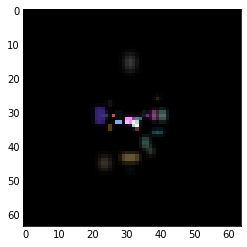

In [95]:
plt.imshow(render)

In [96]:
def image_to_phosphenes(image : np.ndarray):
    global grid
    stimulus = Stimulus(color.rgb2gray(image), grid)
    render = grid.render(stimulus.vector)
    #plt.imshow(render, cmap='gray')
    return (render + 1) / 2

In [97]:
%time render = image_to_phosphenes(digit_to_image(6, 0.5, 0.45))

CPU times: user 39.2 ms, sys: 5.79 ms, total: 45 ms
Wall time: 41.3 ms


## Phosphenes to Digit

In [139]:
import tensorflow as tf
import keras
import numpy as np

In [140]:
train_n = 1200
train_truth = np.random.randint(0, 10, train_n)

In [150]:
%time train_data = np.array([image_to_phosphenes(digit_to_image(digit, 0.5, 0.45)) for digit in train_truth])

CPU times: user 37.2 s, sys: 2.89 s, total: 40.1 s
Wall time: 40.6 s


In [151]:
test_n = 600
test_truth = np.random.randint(0, 10, test_n)

In [152]:
%time test_data = np.array([image_to_phosphenes(digit_to_image(digit, 0.5, 0.45)) for digit in test_truth ])

CPU times: user 18.1 s, sys: 1.28 s, total: 19.4 s
Wall time: 19.4 s


In [153]:
input_shape = (64, 64, 3)

In [161]:
decode_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),  
    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
    tf.keras.layers.Dense(32, activation=tf.nn.relu),  
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [162]:
decode_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [164]:
decode_model.fit(train_data, train_truth, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 1s 1ms/sample - loss: 1.2064 - accuracy: 0.5175
Epoch 2/10
1200/1200 [==============================] - 1s 1ms/sample - loss: 1.0241 - accuracy: 0.5983
Epoch 3/10
1200/1200 [==============================] - 1s 1ms/sample - loss: 0.9594 - accuracy: 0.5942
Epoch 4/10
1200/1200 [==============================] - 1s 1ms/sample - loss: 0.9485 - accuracy: 0.6167
Epoch 5/10
1200/1200 [==============================] - 1s 1ms/sample - loss: 1.5696 - accuracy: 0.4342
Epoch 6/10
1200/1200 [==============================] - 2s 2ms/sample - loss: 0.9487 - accuracy: 0.6208
Epoch 7/10
1200/1200 [==============================] - 2s 2ms/sample - loss: 0.6908 - accuracy: 0.7508
Epoch 8/10
1200/1200 [==============================] - 2s 2ms/sample - loss: 0.6276 - accuracy: 0.7975
Epoch 9/10
1200/1200 [==============================] - 2s 1ms/sample - loss: 0.4684 - accuracy: 0.8992
Epoch 10/10
1200/1200 [==============================] - 2s 1ms/

In [166]:
decode_model.evaluate(test_data, test_truth)

600/600 [==============================] - 0s 476us/sample - loss: 0.4641 - accuracy: 0.8933


[0.4641490638256073, 0.8933333]

# Encoding Network: Mimic-Based and Refine

In [ ]:
renders = [digit2]

# Encoding Network: Classification Based

In [171]:
test = color.rgb2gray(digit_to_image(9, 0.5, 0.45))

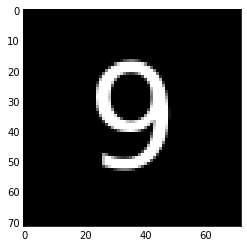

In [172]:
plt.imshow(test, cmap='gray')

In [173]:
input_shape = (72, 72)

In [174]:
output_shape = (12, 12)

In [175]:
def make_encoder_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=input_shape))
    model.add(tf.keras.layers.Dense(12*12*6))
    model.add(tf.keras.layers.Dense(12*12))
    #print(model.output_shape)
    return model

In [176]:
test_batch = np.array([test])

In [177]:
test_tensor = tf.convert_to_tensor(test_batch, dtype=tf.float32)

In [178]:
encoder = make_encoder_model()
test_encode = encoder(test_tensor)

In [179]:
test_render = grid.render(test_encode.numpy()[0])

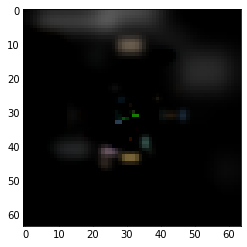

In [180]:
plt.imshow(test_render, cmap='gray')

In [46]:
def decision(encoded):
    encoded_np = encoded.numpy()
    rendered = grid.render(encoded_np[0])
    result = decode_model.predict(np.array([rendered]))
    return result

In [47]:
decision(test_encode)

array([[0.26779255, 0.03573375, 0.03210891, 0.01346466, 0.01801454,
        0.22118224, 0.05962803, 0.18494022, 0.14510848, 0.02202659]],
      dtype=float32)

In [48]:
cce = tf.keras.losses.CategoricalCrossentropy()

In [49]:
encoder_optimiser = tf.keras.optimizers.Adam(1e-4)

In [50]:
EPOCHS = 10

In [68]:
test_tensor[0]

<tf.Tensor: id=9045, shape=(72, 72), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [96]:
grid.render(encoder(test_tensor)[0])

array([[-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [-0.9741347 , -0.97160107, -0.9661644 , ..., -0.98577005,
        -0.9861137 , -0.9862605 ],
       [-0.9806204 , -0.9779152 , -0.97212625, ..., -0.9905327 ,
        -0.9910063 , -0.9912161 ],
       [-0.9835712 , -0.9807856 , -0.97483116, ..., -0.9927032 ,
        -0.99323654, -0.9934753 ]], dtype=float32)

In [99]:
def make_decision(encoded_vector):
    global grid
    return decode_model.predict(np.array([grid.render(encoded_vector[0])]))

In [100]:
make_decision(encoder(test_tensor))

array([[0.26779264, 0.03573374, 0.0321089 , 0.01346465, 0.01801452,
        0.22118226, 0.05962803, 0.18494014, 0.14510849, 0.02202658]],
      dtype=float32)

In [ ]:
encoder = make_encoder_model()

In [101]:
#@tf.function
def train_step(digit):
    
    image = color.rgb2gray(digit_to_image(digit, 0.5, 0.5))
    image_tensor = tf.convert_to_tensor(np.array([image]), dtype=tf.float32)
    base = np.zeros(10)
    base[digit] = 1 

    with tf.GradientTape() as encoder_tape:
        
        encoded = encoder(image_tensor, training=True)
        decision = make_decision(encoded)
        result = (base, decision)
        loss = cce(*result)
        
    gradient = encoder_tape.gradient(loss, encoder.trainable_variables)
    encoder_optimiser.apply_gradients(zip(gradient, encoder.trainable_variables))

In [102]:
def train(epochs):
    for digit in np.random.randint(0, 10, 1000):
        train_step(digit)

In [103]:
train(EPOCHS)

ValueError: No gradients provided for any variable: ['dense_7/kernel:0', 'dense_7/bias:0', 'dense_8/kernel:0', 'dense_8/bias:0'].